# Mushroom Classification


# Context

Although this dataset was originally contributed to the UCI Machine Learning repository nearly 30 years ago, mushroom hunting (otherwise known as "shrooming") is enjoying new peaks in popularity. Learn which features spell certain death and which are most palatable in this dataset of mushroom characteristics. And how certain can your model be?

# Content

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

# Task

Predict whether a mushroom is `edible` or `poisonous`.

## Implementation with `Keras`

In [19]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Tools from Sklearn
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, precision_score, roc_curve
# Neural Network 
from keras import Sequential
from keras.layers import Dense, Flatten
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
# import data
df = pd.read_csv('../data/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Encoding the Data

In [3]:
encoded_data = df.copy()
encoder = LabelEncoder()
for i in df.columns:
    encoded_data[i] = encoder.fit_transform(encoded_data[i])

encoded_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [21]:
# Splitting the data
X = encoded_data.drop("class", axis=1)
y = encoded_data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [22]:
X_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7794,3,2,2,0,7,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,0
6836,2,2,4,0,2,1,0,1,0,1,...,2,7,7,0,2,1,0,7,4,2
4985,2,0,3,0,2,1,0,0,2,0,...,1,0,0,0,2,1,2,1,4,1
7167,0,0,3,0,5,1,1,0,2,0,...,2,7,7,0,2,2,4,7,3,1
2985,2,3,3,1,5,1,0,0,10,1,...,2,3,6,0,2,1,4,2,5,0


In [7]:
# Building the Neural Network

# Define function with default hyperparameters
def keras_clf(var_activation='relu', var_optimizer='adam'):
    '''
    Build's a Keras model with given hyperparameters
    '''
    model = Sequential()
    model.add(Dense(22, input_dim=22, activation=var_activation))
    model.add(Dense(44, activation=var_activation))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=var_optimizer, metrics=['accuracy'])
    return model


In [23]:
# Instantiate model
model = KerasClassifier(build_fn=keras_clf, epochs=24, batch_size=16)

# Define hyperparameter grid
param_grid = {'var_activation':['tanh', 'relu', 'selu'],
              'var_optimizer':['sgd', 'adam', 'RMSprop'],
              'batch_size':[32]}


In [24]:
rscv = RandomizedSearchCV(model, param_distributions=param_grid, cv=3, 
                          n_iter=5, verbose=1)
rscv_results = rscv.fit(X_train,y_train)

print('Best score is: {} using {}'.format(rscv_results.best_score_, rscv_results.best_params_))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/24
3466/3466 [==============================] - 0s 80us/step - loss: 0.4902 - accuracy: 0.7634
Epoch 2/24
3466/3466 [==============================] - 0s 59us/step - loss: 0.3041 - accuracy: 0.8777
Epoch 3/24
3466/3466 [==============================] - 0s 58us/step - loss: 0.2289 - accuracy: 0.9158
Epoch 4/24
3466/3466 [==============================] - 0s 58us/step - loss: 0.1788 - accuracy: 0.9339
Epoch 5/24
3466/3466 [==============================] - 0s 61us/step - loss: 0.1391 - accuracy: 0.9489
Epoch 6/24
3466/3466 [==============================] - 0s 60us/step - loss: 0.1087 - accuracy: 0.9593
Epoch 7/24
3466/3466 [==============================] - 0s 62us/step - loss: 0.0832 - accuracy: 0.9717
Epoch 8/24
3466/3466 [==============================] - 0s 63us/step - loss: 0.0654 - accuracy: 0.9804
Epoch 9/24
3466/3466 [==============================] - 0s 60us/step - loss: 0.0521 - accuracy: 0.9856
Epoch 10/24
3466/3466 [==============================] - 0s 61us/step - l

3466/3466 [==============================] - 0s 56us/step - loss: 0.2581 - accuracy: 0.9134
Epoch 7/24
3466/3466 [==============================] - 0s 54us/step - loss: 0.2380 - accuracy: 0.9221
Epoch 8/24
3466/3466 [==============================] - 0s 55us/step - loss: 0.2214 - accuracy: 0.9319
Epoch 9/24
3466/3466 [==============================] - 0s 54us/step - loss: 0.2077 - accuracy: 0.9362
Epoch 10/24
3466/3466 [==============================] - 0s 54us/step - loss: 0.1944 - accuracy: 0.9411
Epoch 11/24
3466/3466 [==============================] - 0s 55us/step - loss: 0.1823 - accuracy: 0.9440
Epoch 12/24
3466/3466 [==============================] - 0s 56us/step - loss: 0.1733 - accuracy: 0.9475
Epoch 13/24
3466/3466 [==============================] - 0s 54us/step - loss: 0.1615 - accuracy: 0.9521
Epoch 14/24
3466/3466 [==============================] - 0s 57us/step - loss: 0.1495 - accuracy: 0.9547
Epoch 15/24
3466/3466 [==============================] - 0s 53us/step - loss: 0

3466/3466 [==============================] - 0s 66us/step - loss: 0.0332 - accuracy: 0.9928
Epoch 12/24
3466/3466 [==============================] - 0s 68us/step - loss: 0.0276 - accuracy: 0.9934
Epoch 13/24
3466/3466 [==============================] - 0s 66us/step - loss: 0.0203 - accuracy: 0.9962
Epoch 14/24
3466/3466 [==============================] - 0s 67us/step - loss: 0.0177 - accuracy: 0.9977
Epoch 15/24
3466/3466 [==============================] - 0s 66us/step - loss: 0.0136 - accuracy: 0.9991
Epoch 16/24
3466/3466 [==============================] - 0s 67us/step - loss: 0.0113 - accuracy: 0.9994
Epoch 17/24
3466/3466 [==============================] - 0s 66us/step - loss: 0.0100 - accuracy: 0.9997
Epoch 18/24
3466/3466 [==============================] - 0s 67us/step - loss: 0.0094 - accuracy: 0.9988
Epoch 19/24
3466/3466 [==============================] - 0s 68us/step - loss: 0.0071 - accuracy: 0.9994
Epoch 20/24
3466/3466 [==============================] - 0s 66us/step - loss

3466/3466 [==============================] - 0s 60us/step - loss: 0.1249 - accuracy: 0.9582
Epoch 17/24
3466/3466 [==============================] - 0s 57us/step - loss: 0.1189 - accuracy: 0.9573
Epoch 18/24
3466/3466 [==============================] - 0s 57us/step - loss: 0.1114 - accuracy: 0.9619
Epoch 19/24
3466/3466 [==============================] - 0s 58us/step - loss: 0.1040 - accuracy: 0.9639
Epoch 20/24
3466/3466 [==============================] - 0s 58us/step - loss: 0.0983 - accuracy: 0.9680
Epoch 21/24
3466/3466 [==============================] - 0s 58us/step - loss: 0.0979 - accuracy: 0.9700
Epoch 22/24
3466/3466 [==============================] - 0s 57us/step - loss: 0.0917 - accuracy: 0.9691
Epoch 23/24
3466/3466 [==============================] - 0s 58us/step - loss: 0.0850 - accuracy: 0.9749
Epoch 24/24
1733/1733 [==============================] - 0s 41us/step
Epoch 1/24
3466/3466 [==============================] - 0s 80us/step - loss: 0.4829 - accuracy: 0.7853
Epoch 2

3466/3466 [==============================] - 0s 60us/step - loss: 0.0082 - accuracy: 0.9980
Epoch 22/24
3466/3466 [==============================] - 0s 59us/step - loss: 0.0080 - accuracy: 0.9980
Epoch 23/24
3466/3466 [==============================] - 0s 61us/step - loss: 0.0076 - accuracy: 0.9974
Epoch 24/24
1733/1733 [==============================] - 0s 40us/step
Epoch 1/24
3466/3466 [==============================] - 0s 81us/step - loss: 0.4434 - accuracy: 0.8001
Epoch 2/24
3466/3466 [==============================] - 0s 61us/step - loss: 0.2502 - accuracy: 0.9062
Epoch 3/24
3466/3466 [==============================] - 0s 59us/step - loss: 0.1727 - accuracy: 0.9383
Epoch 4/24
3466/3466 [==============================] - 0s 60us/step - loss: 0.1301 - accuracy: 0.9533
Epoch 5/24
3466/3466 [==============================] - 0s 60us/step - loss: 0.1020 - accuracy: 0.9668
Epoch 6/24
3466/3466 [==============================] - 0s 60us/step - loss: 0.0812 - accuracy: 0.9763
Epoch 7/24
3

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.4min finished


Epoch 1/24
5199/5199 [==============================] - 0s 84us/step - loss: 0.3950 - accuracy: 0.8277
Epoch 2/24
5199/5199 [==============================] - 0s 67us/step - loss: 0.2157 - accuracy: 0.9211
Epoch 3/24
5199/5199 [==============================] - 0s 67us/step - loss: 0.1549 - accuracy: 0.9410
Epoch 4/24
5199/5199 [==============================] - 0s 65us/step - loss: 0.1086 - accuracy: 0.9606
Epoch 5/24
5199/5199 [==============================] - 0s 67us/step - loss: 0.0781 - accuracy: 0.9725
Epoch 6/24
5199/5199 [==============================] - 0s 67us/step - loss: 0.0567 - accuracy: 0.9827
Epoch 7/24
5199/5199 [==============================] - 0s 66us/step - loss: 0.0424 - accuracy: 0.9873
Epoch 8/24
5199/5199 [==============================] - 0s 67us/step - loss: 0.0322 - accuracy: 0.9915
Epoch 9/24
5199/5199 [==============================] - 0s 67us/step - loss: 0.0240 - accuracy: 0.9940
Epoch 10/24
5199/5199 [==============================] - 0s 67us/step - l

# Evaluate on Validation data

In [25]:
y_preds_valid = rscv_results.predict(X_valid)

In [26]:
def test_eval_clf(y_test, y_preds):
    '''
    This function evaluates the predictions made by
    a Classification model on the test set.
    '''
    acc = accuracy_score(y_test, y_preds)
    prec = precision_score(y_test, y_preds)
    recall = recall_score(y_test, y_preds)
    f1 = f1_score(y_test, y_preds)
    auc = roc_auc_score(y_test, y_preds)
    
    print("Results of evaluation on test data")
    return {"Accuracy": acc, "Precision": prec, "Recall": recall, "F1-score": f1, "AUC score": auc}

In [28]:
test_eval_clf(y_valid, y_preds_valid)

Results of evaluation on test data


{'Accuracy': 1.0,
 'Precision': 1.0,
 'Recall': 1.0,
 'F1-score': 1.0,
 'AUC score': 1.0}

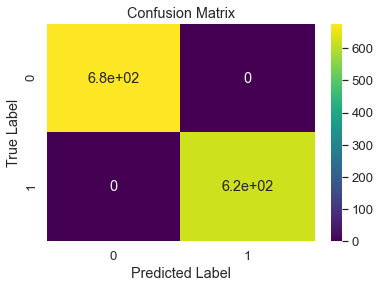

In [29]:
import seaborn as sns
# Plot confusion matrix
def plot_conf_mat(y_test, y_preds):
    cm = confusion_matrix(y_test, y_preds)
    sns.set(font_scale=1.2)
    sns.heatmap(data=cm, cmap='viridis', annot=True)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix");
    return

plot_conf_mat(y_valid, y_preds_valid)

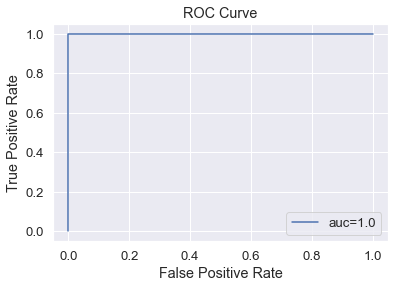

In [30]:
y_preds_valid = rscv_results.predict(X_valid)
fpr, tpr, _ = roc_curve(y_valid,  y_preds_valid)
auc = roc_auc_score(y_valid, y_preds_valid)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Evaluate on Test Data

In [31]:
y_preds = rscv_results.predict(X_test)
test_eval_clf(y_test, y_preds)

Results of evaluation on test data


{'Accuracy': 1.0,
 'Precision': 1.0,
 'Recall': 1.0,
 'F1-score': 1.0,
 'AUC score': 1.0}